<a href="https://colab.research.google.com/github/Gowri-Rk/EmergingTechnologiesAssignments/blob/master/Assignment_7/GradientBoosting_FromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementation of gradient boosting ensemble method**




Reference:

https://github.com/groverpr/Machine-Learning/blob/master/notebooks/01_Gradient_Boosting_Scratch.ipynb



In [1]:
%matplotlib inline

#IMPORTS


import pandas as pd
import numpy as np


from fastai.imports import *
from IPython.display import display
from sklearn import metrics

In [2]:
def standardAgg(c, s1, s2):
  return math.sqrt( (s2/c) - (s1/c) ** 2)


In [12]:
class DTree():
  def __init__(self, x, y, indices = None, minLeaf = 2):
    if indices is None:
      indices = np.arange(len(y))

      self.x = x
      self.y = y
      self.indices = indices
      self.minLeaf = minLeaf

      self.n = len(indices)
      self.c = x.shape[1]
      self.val = np.mean(y[indices])

      self.score = float('inf')
      self.findVarSplit()
  

  def findVarSplit(self):

    for i in range(self.c):
      self.findBetterSplit(i)
    
    if self.score == float('inf'): 
      return
    
    x = self.splitColumn

    left = np.nonzero(x<=self.split)[0]
    right = np.nonzero(x>self.split)[0]

    self.left = DTree(self.x, self.y, self.indices[left])
    self.right = DTree(self.x, self.y, self.indices[right])


  
  def findBetterSplit(self, v_indices):
    x = self.x.values[self.indices, v_indices]
    y = self.y[self.indices]

    sortedIndices = np.argsort(x)

    sortedY = y[sortedIndices]
    sortedX = x[sortedIndices]

    rhs_cnt = self.n
    rhs_sum = sortedY.sum()
    rhs_sum2 = (sortedY**2).sum()
    lhs_cnt = 0
    lhs_sum = 0.
    lhs_sum2 = 0.

    for i in range(0,self.n - self.minLeaf - 1):
      xi, yi = sortedX[i],sortedY[i]
      lhs_cnt += 1
      rhs_cnt -= 1
      lhs_sum += yi
      rhs_sum -= yi
      lhs_sum2 += yi**2
      rhs_sum2 -= yi**2
      if i<self.minLeaf or xi == sortedX[i+1]:
        continue

      lhs_std = standardAgg(lhs_cnt, lhs_sum, lhs_sum2)
      rhs_std = standardAgg(rhs_cnt, rhs_sum, rhs_sum2)
      curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
      if curr_score<self.score: 
        self.v_indices = v_indices
        self.score = curr_score
        self.split = xi
      
  @property
  def splitName(self): return self.x.columns[self.v_indices]
    
  @property
  def splitColumn(self): return self.x.values[self.indices, self.v_indices]

  @property
  def isLeaf(self): return self.score == float('inf')
    
  def __repr__(self):
    s = f'n: {self.n}; val:{self.val}'
    if not self.is_leaf:
      s += f'; score:{self.score}; split:{self.split}; var:{self.splitName}'
      return s

  def predict(self, x):
    return np.array([self.predictRow(xi) for xi in x])

  def predictRow(self, xi):
    if self.isLeaf: 
      return self.val
    
    t = self.left if xi[self.v_indices]<=self.split else self.right
    return t.predictRow(xi)
  




## Data Simulation

In [5]:
x = np.arange(0,50)
x = pd.DataFrame({'x':x})

In [6]:
# GENERATING RANDOM UNIFORM DISTRIBUTIONS

y1 = np.random.uniform(10,15,10)
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,32,10)
y5 = np.random.uniform(13,17,10)

y = np.concatenate((y1,y2,y3,y4,y5))
y = y[:,None]

### Scatter plot

In [7]:
x.shape, y.shape


((50, 1), (50, 1))

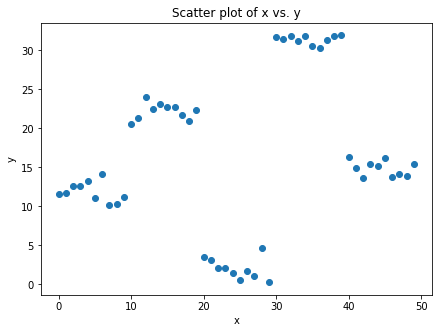

In [8]:
plt.figure(figsize=(7,5))
plt.plot(x,y, 'o')
plt.title("Scatter plot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Generating decision trees for the sample data, with x as input and y as target variable

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

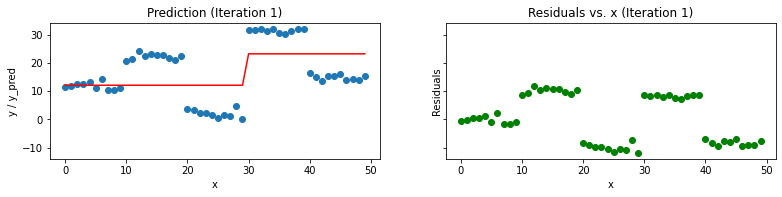

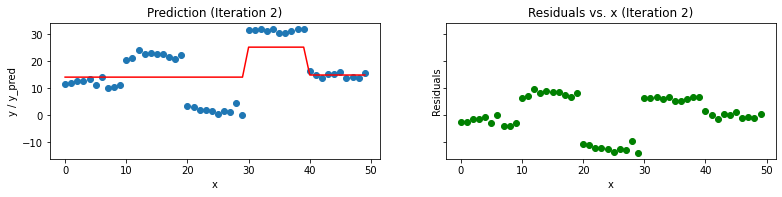

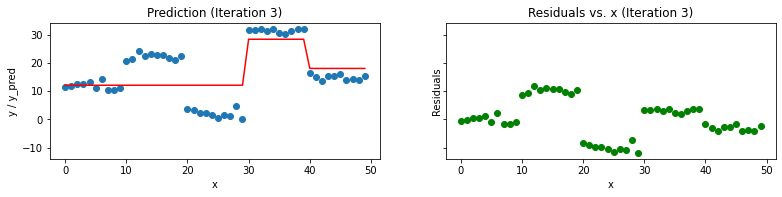

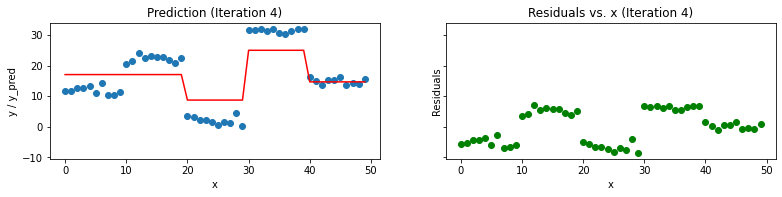

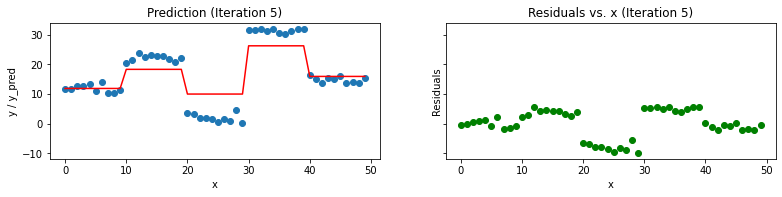

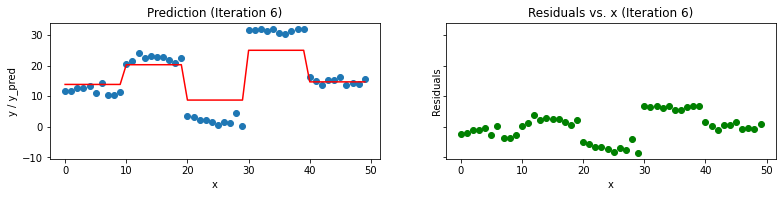

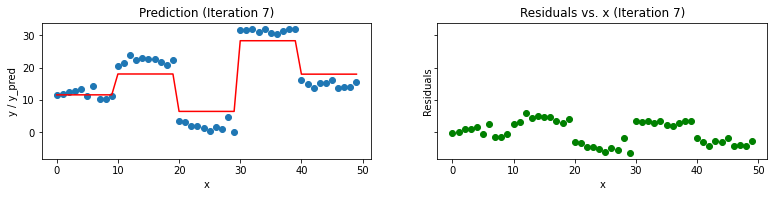

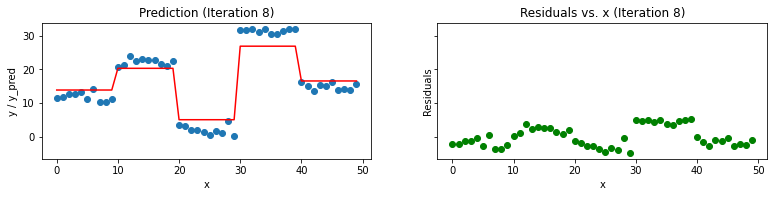

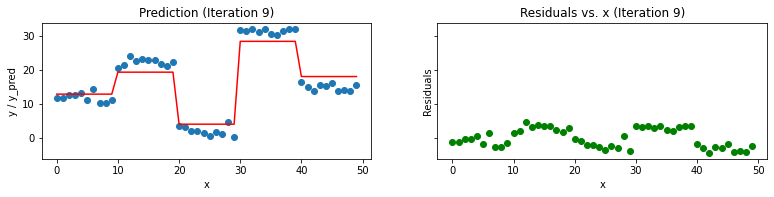

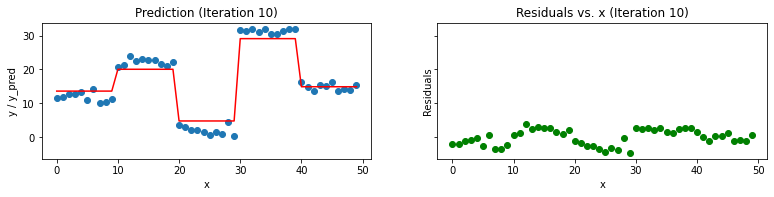

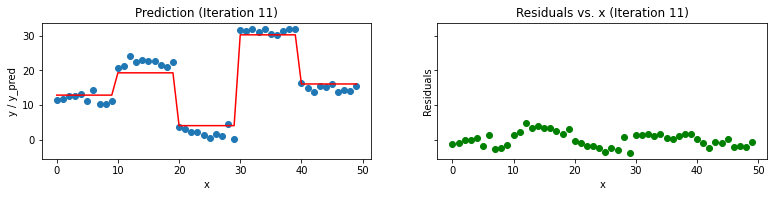

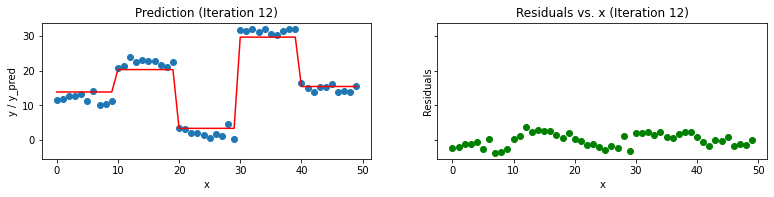

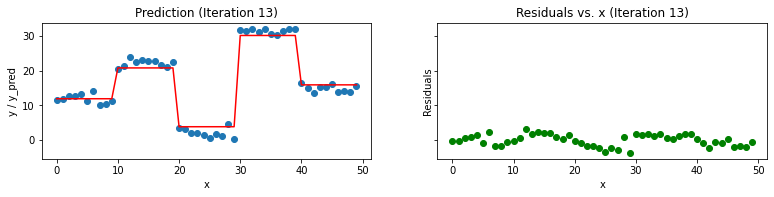

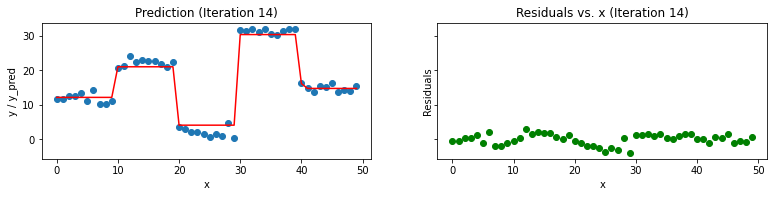

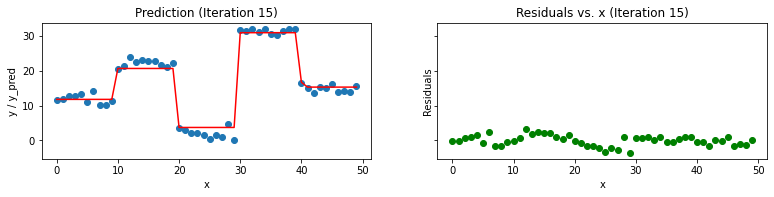

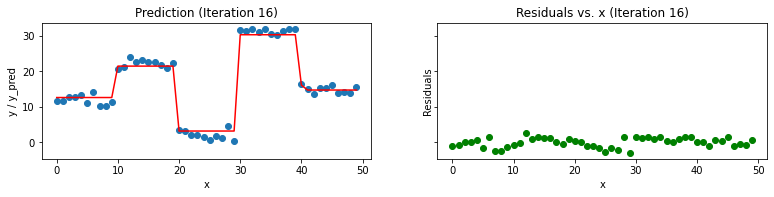

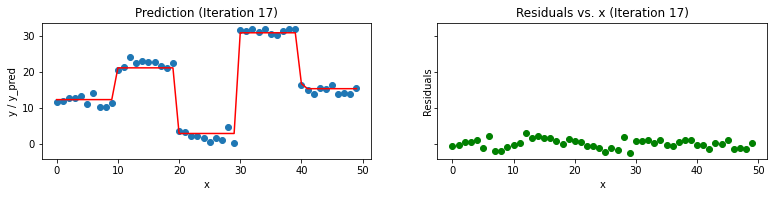

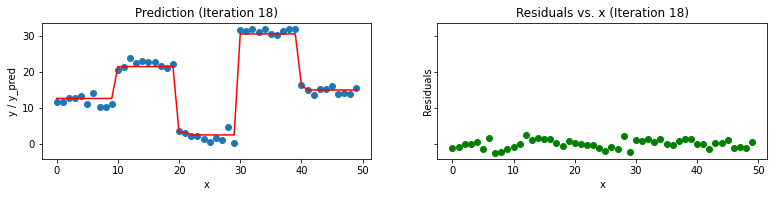

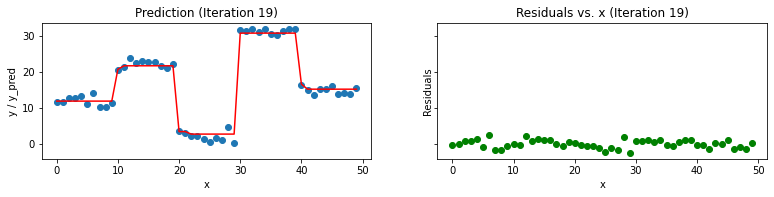

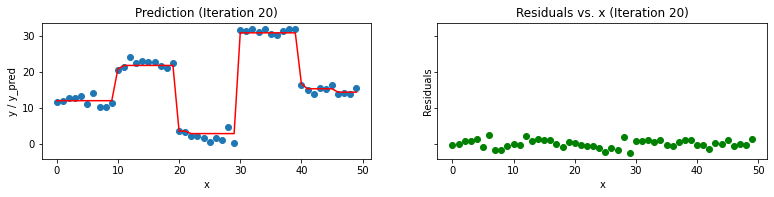

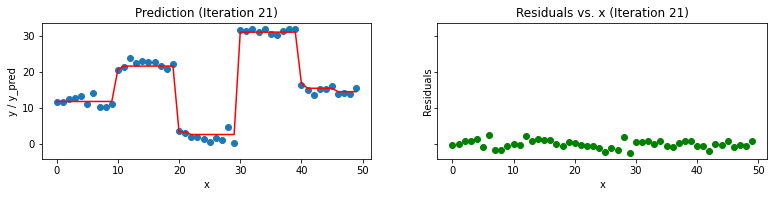

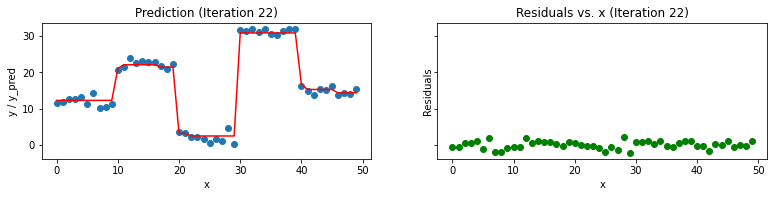

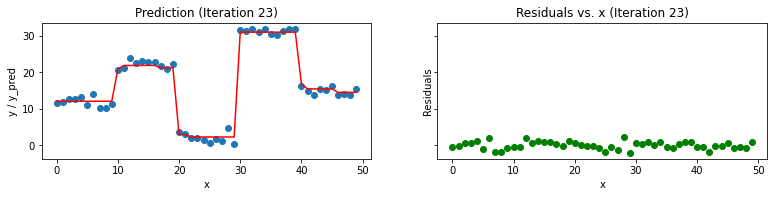

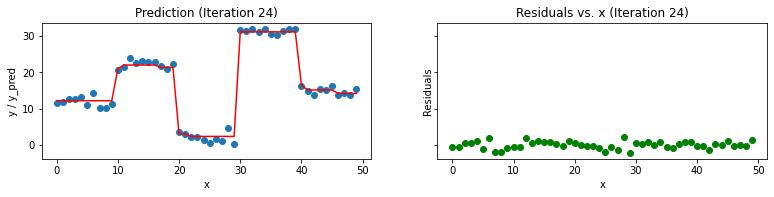

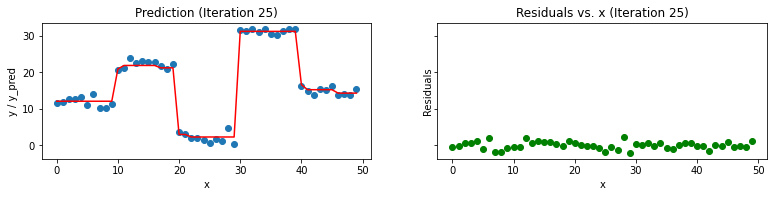

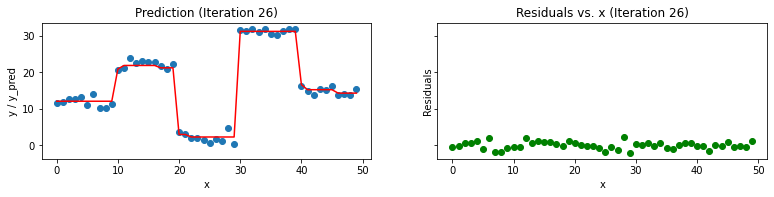

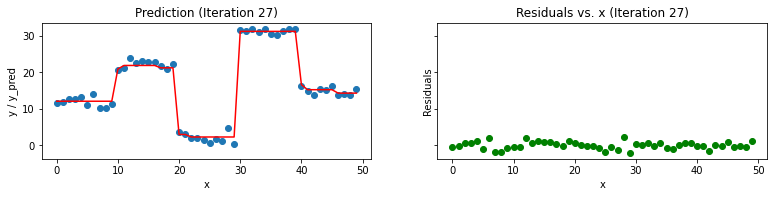

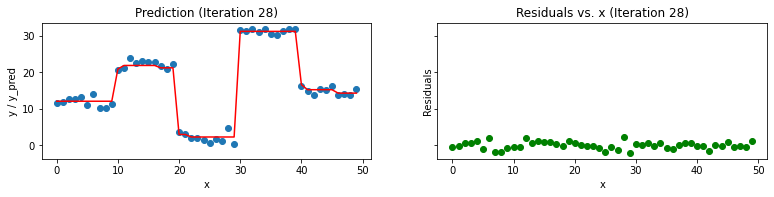

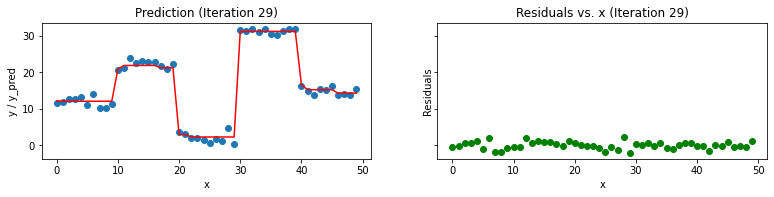

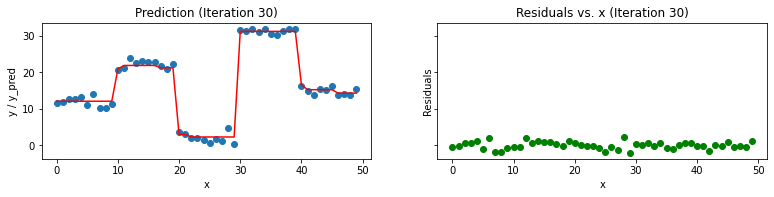

In [13]:
xi = x
yi = y

error = 0 
n = len(yi) 
prediectedVal = 0

for i in range(30): 
    tree = DTree(xi,yi)

    tree.findBetterSplit(0)
    
    r = np.where(xi == tree.split)[0][0]
    
    left_idx = np.where(xi <= tree.split)[0]
    right_idx = np.where(xi > tree.split)[0]
    
    predicted = np.zeros(n)
    np.put(predicted, left_idx, np.repeat(np.mean(yi[left_idx]), r))
    np.put(predicted, right_idx, np.repeat(np.mean(yi[right_idx]), n-r))
    
    predicted = predicted[:,None]
    prediectedVal = prediectedVal + predicted
    
    error = y - prediectedVal    
    yi = error
    
    
    # plotting after prediction
    xa = np.array(x.x) 
    order = np.argsort(xa)
    xs = np.array(xa)[order]
    ys = np.array(prediectedVal)[order]
    


    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (13,2.5))

    ax1.plot(x,y, 'o')
    ax1.plot(xs, ys, 'r')
    ax1.set_title(f'Prediction (Iteration {i+1})')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y / y_pred')

    ax2.plot(x, error, 'go')
    ax2.set_title(f'Residuals vs. x (Iteration {i+1})')
    ax2.set_xlabel('x')
    ax2.set_ylabel('Residuals')